In [1]:
# Load the necessary libraries
library(ggplot2)

In [14]:
# Load data
weatherData <- read.csv("/Users/naman/Workspace/Data/Regression-Analysis/shuffle_file.csv")
# weatherData <- read.csv("shuffle_file.csv")

# Ensure these column names match your dataset exactly
completeData <- weatherData[, c("Temperature", "Apparent_Temperature")]
colnames(completeData) <- c("temp", "app_temp")

# Clean the data: remove NAs
completeData <- na.omit(completeData)

tail(completeData)

,temp,app_temp
,<dbl>,<dbl>
9995,-1.783333,-1.783333
9996,23.111111,23.111111
9997,28.455556,29.205556
9998,-0.450000,-4.144444
9999,10.527778,10.527778
10000,17.250000,17.250000


In [15]:
tail(weatherData)

,Formatted.Date,Summary,Precip.Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud.Cover,Pressure,Daily.Summary
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9995,2011-10-18 00:00:00.000 +0200,Clear,snow,-1.783333,-1.783333,0.76,3.2200,330,8.1305,0,1026.02,Clear throughout the day.
9996,2007-07-29 02:00:00.000 +0200,Mostly Cloudy,rain,23.111111,23.111111,0.55,17.6939,6,9.9820,0,1013.85,Mostly cloudy throughout the day.
9997,2010-07-31 14:00:00.000 +0200,Mostly Cloudy,rain,28.455556,29.205556,0.52,7.5509,222,11.4471,0,1013.89,Mostly cloudy throughout the day.
9998,2016-12-22 08:00:00.000 +0100,Mostly Cloudy,snow,-0.450000,-4.144444,0.90,11.2217,165,5.7960,0,1020.62,Mostly cloudy throughout the day.
9999,2016-10-18 19:00:00.000 +0200,Mostly Cloudy,,10.527778,10.527778,0.66,10.6743,117,9.9820,0,1023.64,Mostly cloudy throughout the day.
10000,2016-10-02 20:00:00.000 +0200,Overcast,rain,17.250000,17.250000,0.81,15.4238,312,9.9015,0,1014.49,Mostly cloudy starting in the morning.


In [3]:
# Fitting a linear model
# Ensure these column names match your dataset exactly
fit <- lm(app_temp ~ temp, data = completeData)

# Summary of the model
summary(fit)


Call:
lm(formula = app_temp ~ temp, data = completeData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8746 -0.7096  0.1759  0.8342  4.6410 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.419343   0.020867  -115.9   <2e-16 ***
temp         1.112331   0.001368   812.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.298 on 9998 degrees of freedom
Multiple R-squared:  0.9851,	Adjusted R-squared:  0.9851 
F-statistic: 6.608e+05 on 1 and 9998 DF,  p-value: < 2.2e-16


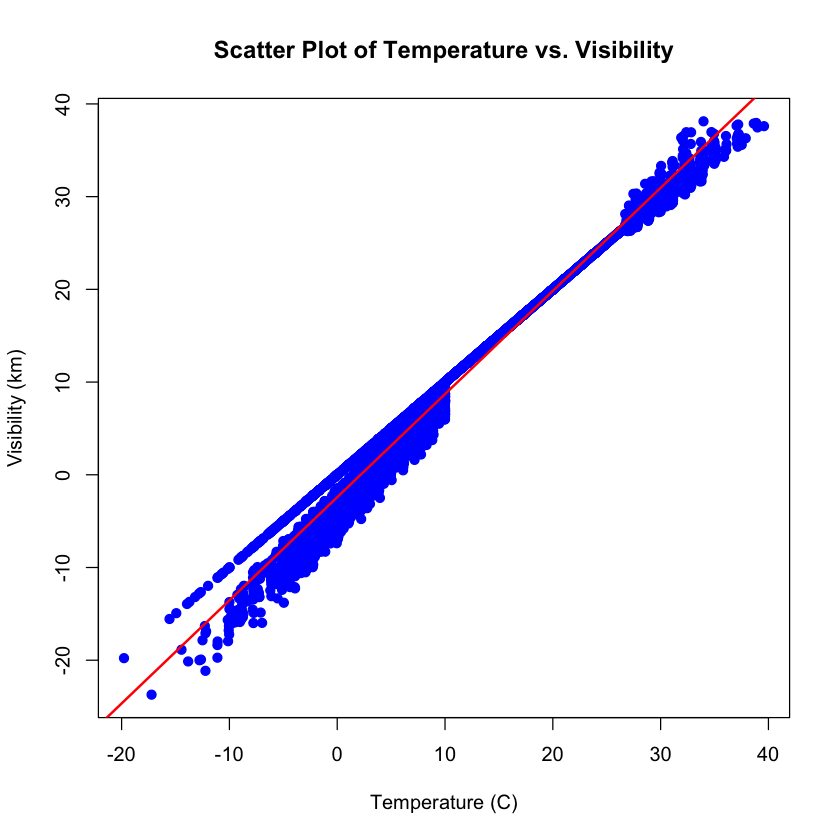

In [9]:
# Basic scatter plot with a regression line
par(bg = "white")
plot(completeData$temp, completeData$app_temp, main = "Scatter Plot of Temperature vs. Visibility",
     xlab = "Temperature (C)", ylab = "Visibility (km)", pch = 19, col = 'blue')
abline(fit, col = "red", lwd = 2)

`geom_smooth()` using formula = 'y ~ x'


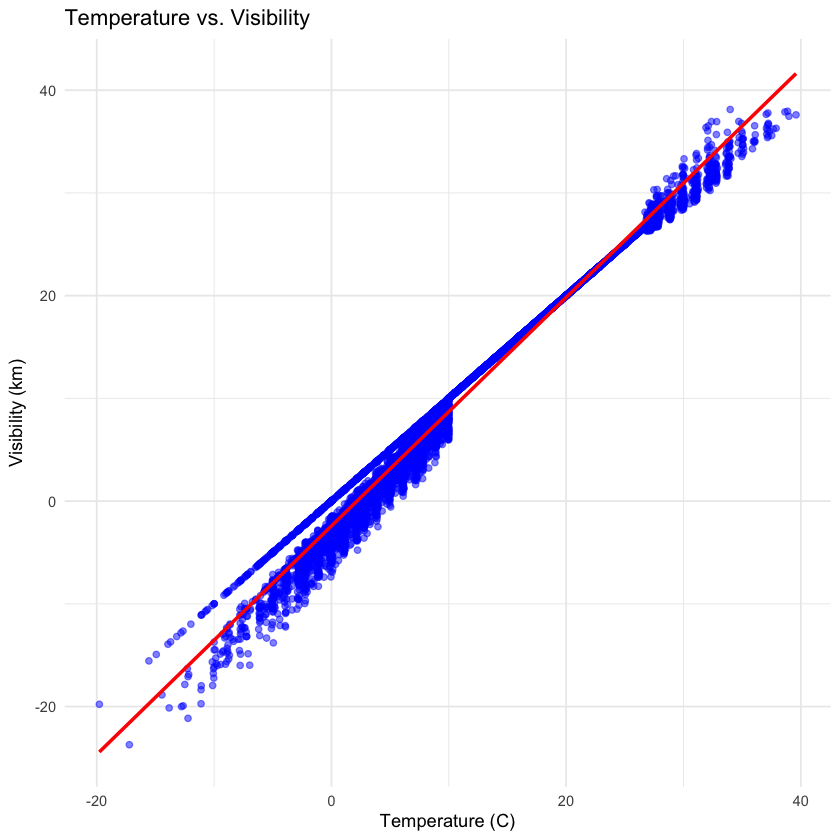

In [10]:
# Using ggplot2 for a better visualization
ggplot(completeData, aes(x = temp, y = app_temp)) +
  geom_point(color = 'blue', alpha = 0.5) +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  theme_minimal() +
  labs(title = "Temperature vs. Visibility",
       x = "Temperature (C)", y = "Visibility (km)")

[1] -0.6253346

[1] -0.5940753

[1] -0.0004293969

[1] -0.3531789

[1] -0.0009092771

[1] 0.09648268

[1] 0.01358384

[1] -0.0591736

[1] 0.387416

[1] 0.05984502

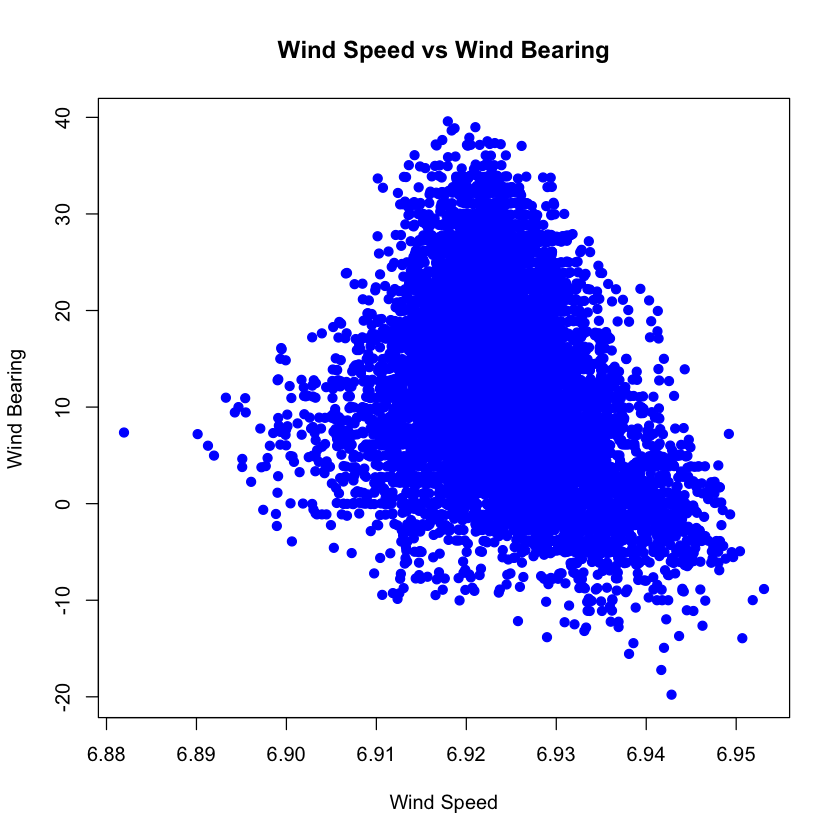

In [11]:
c_hum_temp <- cor(weatherData$Humidity, weatherData$Temperature)
c_hum_temp

c_hum_atemp <- cor(weatherData$Humidity, weatherData$Apparent_Temperature)
c_hum_atemp

c_temp_press <- cor(weatherData$Temperature, weatherData$Pressure)
c_temp_press

c_vis_hum <- cor(weatherData$Visibility, weatherData$Humidity)
c_vis_hum

c_wind_temp <- cor(weatherData$Wind_Speed, weatherData$Temperature)
c_wind_temp

c_windb_wind <- cor(weatherData$Wind_Bearing, weatherData$Wind_Speed)
c_windb_wind

c_press_hum <- cor(weatherData$Pressure, weatherData$Humidity)
c_press_hum

c_press_wind <- cor(weatherData$Pressure, weatherData$Wind_Speed)
c_press_wind

c_temp_vis <- cor(weatherData$Temperature, weatherData$Visibility)
c_temp_vis

c_vis_press <- cor(weatherData$Visibility, weatherData$Pressure)
c_vis_press

par(bg = "white")
plot( y = weatherData$Temperature, x = log(weatherData$Pressure), main = "Wind Speed vs Wind Bearing", xlab = "Wind Speed", ylab = "Wind Bearing", col = "blue", pch = 19)


Call:
lm(formula = Visibility ~ Humidity + Wind_Speed + Pressure, data = weatherData)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8031  -2.6441  -0.3694   3.3002   7.7032 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.4696992  0.3757539  35.847  < 2e-16 ***
Humidity    -7.5059220  0.2056600 -36.497  < 2e-16 ***
Wind_Speed   0.0113432  0.0057818   1.962   0.0498 *  
Pressure     0.0022855  0.0003252   7.028 2.23e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.9 on 9996 degrees of freedom
Multiple R-squared:  0.1293,	Adjusted R-squared:  0.129 
F-statistic: 494.6 on 3 and 9996 DF,  p-value: < 2.2e-16


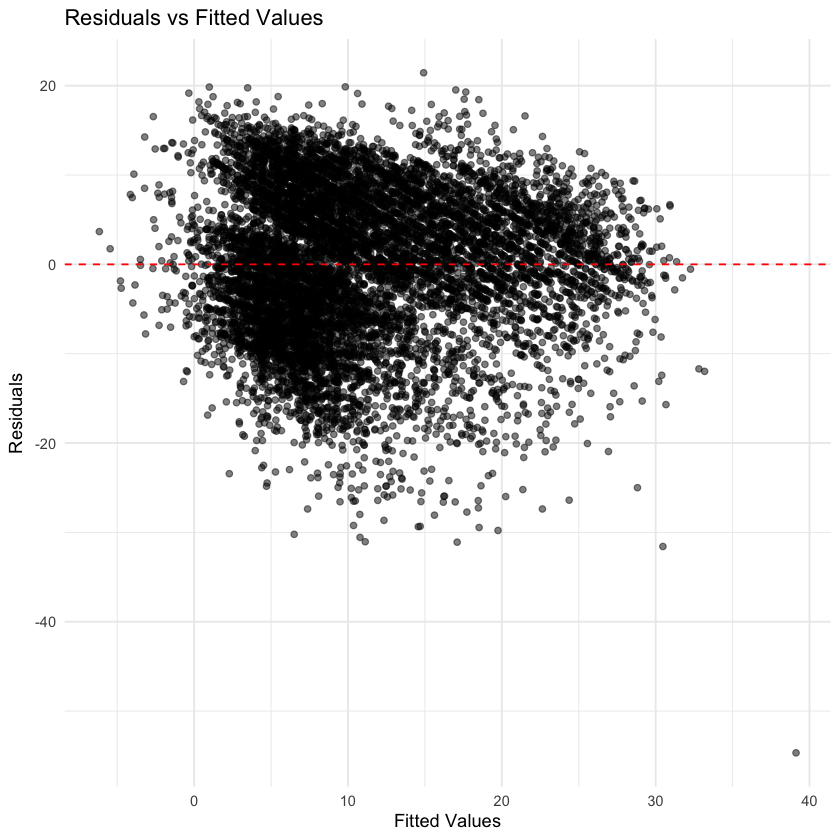

In [16]:
model <- lm(Temperature ~ Humidity + Wind_Speed + Pressure, data = weatherData)

model2 <- lm(Apparent_Temperature ~ Humidity + Wind_Speed + Pressure, data = weatherData)

model3 <- lm(Visibility ~ Humidity + Wind_Speed + Pressure, data = weatherData)

# Calculate residuals and fitted values
weatherData$residuals <- residuals(model2)
weatherData$fitted_values <- fitted(model2)

# Create a ggplot residual plot
ggplot(weatherData, aes(x = fitted_values, y = residuals)) +
  geom_point(alpha=0.5) +
  geom_hline(yintercept=0, color="red", linetype="dashed") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()

summary(model3)

In [17]:
# Get AIC values
# Fit linear, quadratic, cubic, and quartic models
fit1 <- lm(Temperature ~ Humidity + Wind_Speed + Pressure, data = weatherData)
fit2 <- lm(Temperature ~ poly(Humidity, 2) + poly(Wind_Speed, 2) + poly(Pressure, 2), data = weatherData)
fit3 <- lm(Temperature ~ poly(Humidity, 3) + poly(Wind_Speed, 3) + poly(Pressure, 3), data = weatherData)
fit4 <- lm(Temperature ~ poly(Humidity, 3) + poly(Wind_Speed, 1) + poly(Pressure, 3) + poly(Wind_Bearing, 3) + poly(Visibility, 3), data = weatherData)


aic1 <- AIC(fit1)
aic2 <- AIC(fit2)
aic3 <- AIC(fit3)
aic4 <- AIC(fit4)


print(c(aic1, aic2, aic3, aic4))

summary(fit4)

# You can manually inspect the printed AIC values or use a function to find the minimum AIC
# aic_values <- c(linear = aic1, quadratic = aic2, cubic = aic3, quartic = aic4)
# best_model <- names(which.min(aic_values))
# print(paste("Best model based on AIC is:", best_model))


[1] 68060.54 65849.33 65077.89 64392.47



Call:
lm(formula = Temperature ~ poly(Humidity, 3) + poly(Wind_Speed, 
    1) + poly(Pressure, 3) + poly(Wind_Bearing, 3) + poly(Visibility, 
    3), data = weatherData)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.1404  -3.9560   0.4131   4.4765  17.8855 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              11.94114    0.06049 197.408  < 2e-16 ***
poly(Humidity, 3)1     -506.10769    7.36437 -68.724  < 2e-16 ***
poly(Humidity, 3)2      119.78318    6.91691  17.317  < 2e-16 ***
poly(Humidity, 3)3       72.55638    6.34231  11.440  < 2e-16 ***
poly(Wind_Speed, 1)    -201.60894    6.62161 -30.447  < 2e-16 ***
poly(Pressure, 3)1      -13.16713    6.08702  -2.163 0.030553 *  
poly(Pressure, 3)2     -290.63523    6.53514 -44.473  < 2e-16 ***
poly(Pressure, 3)3     -153.50362    6.25099 -24.557  < 2e-16 ***
poly(Wind_Bearing, 3)1   20.09090    6.11939   3.283 0.001030 ** 
poly(Wind_Bearing, 3)2   30.82492    6.11439   5.0

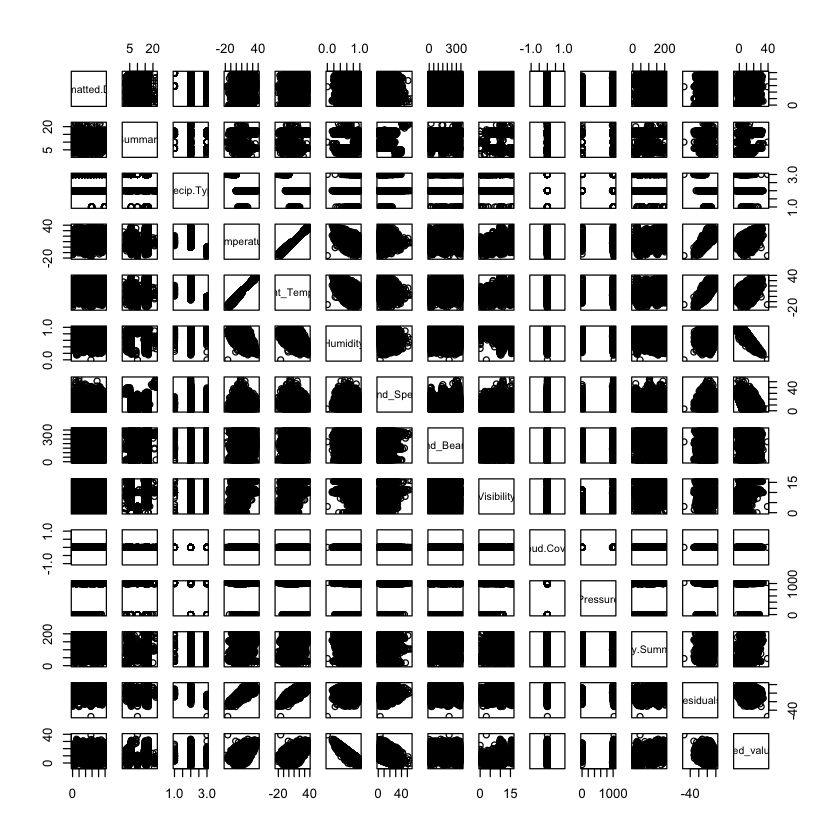

In [19]:
par(bg = "white")
plot(weatherData)